In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

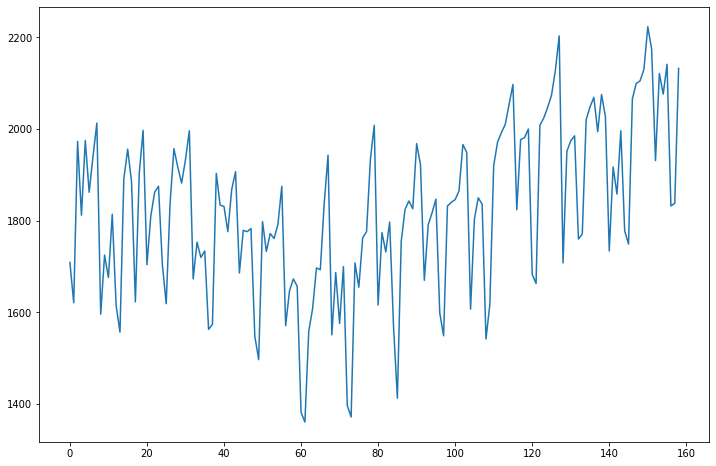

In [3]:
Walmart.Footfalls.plot(figsize=(12,8))

In [4]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

<AxesSubplot: xlabel='month', ylabel='year'>

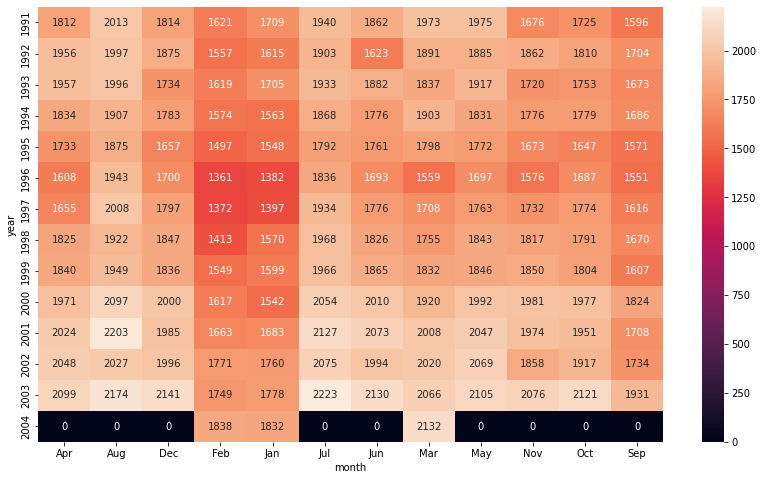

In [5]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=Walmart,values="Footfalls",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot: xlabel='year', ylabel='Footfalls'>

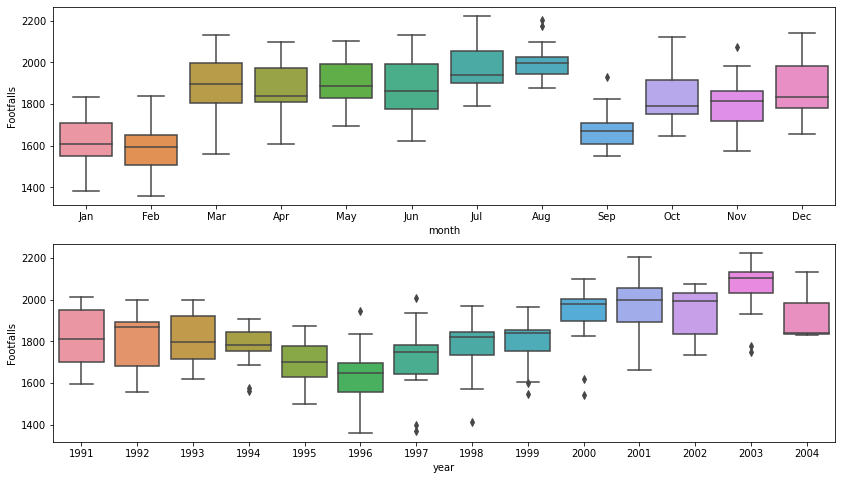

In [6]:
# Boxplot for ever
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=Walmart)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=Walmart)

In [7]:
#month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
#p = Walmart["Month"][0]
#p[0:3]
#Walmart['months']= 0

#for i in range(159):
#    p = Walmart["Month"][i]
#    Walmart['months'][i]= p[0:3]
    
#month_dummies = pd.DataFrame(pd.get_dummies(Walmart['months']))
#Walmart1 = pd.concat([footfalls,month_dummies],axis = 1)

#Walmart1["t"] = np.arange(1,160)

#Walmart1["t_squared"] = Walmart1["t"]*Walmart1["t"]
#Walmart1.columns
#Walmart1["log_footfalls"] = np.log(Walmart1["Footfalls "])
#Walmart1.rename(columns={"Footfalls ": 'Footfalls'}, inplace=True)
#Walmart1.Footfalls.plot()

<AxesSubplot: xlabel='year', ylabel='Footfalls'>

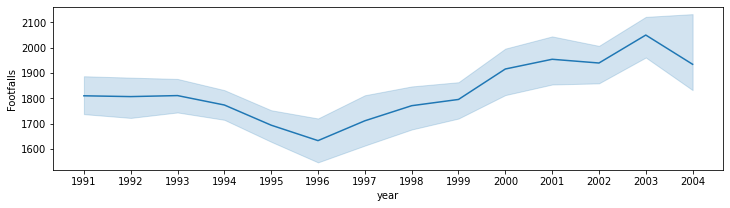

In [8]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=Walmart)

# Splitting data

In [9]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [10]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [11]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     14.40
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           0.000217
Time:                        23:02:12   Log-Likelihood:                -956.67
No. Observations:                 147   AIC:                             1917.
Df Residuals:                     145   BIC:                             1923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1713.1154     27.083     63.254      0.000    1659.586    1766.644
t              1.2046      0.317      3.794      0.000       0.577       1.832
==============================================================================
Omnibus:                        5.273   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.400
Skew:                          -0.456   Prob(JB):                       0.0672
Kurtosis:                       2.775   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#Exponential

Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263569546594

In [13]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_footfalls   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     12.88
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           0.000454
Time:                        23:02:12   Log-Likelihood:                 141.07
No. Observations:                 147   AIC:                            -278.1
Df Residuals:                     145   BIC:                            -272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4440      0.015    481.116      0.000       7.413       7.475
t              0.0007      0.000      3.588      0.000       0.000       0.001
==============================================================================
Omnibus:                       11.184   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.698
Skew:                          -0.682   Prob(JB):                      0.00288
Kurtosis:                       3.216   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Quadratic 

Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356146

In [15]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     21.74
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           5.60e-09
Time:                        23:02:12   Log-Likelihood:                -944.23
No. Observations:                 147   AIC:                             1894.
Df Residuals:                     144   BIC:                             1903.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1859.2033     37.780     49.211      0.000    1784.528    1933.878
t             -4.6781      1.179     -3.969      0.000      -7.008      -2.349
t_square       0.0397      0.008      5.153      0.000       0.025       0.055
==============================================================================
Omnibus:                        8.449   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.481
Skew:                          -0.476   Prob(JB):                       0.0237
Kurtosis:                       2.439   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.66439005687687

In [17]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     15.70
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           2.17e-19
Time:                        23:02:12   Log-Likelihood:                -903.08
No. Observations:                 147   AIC:                             1830.
Df Residuals:                     135   BIC:                             1866.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1835.3333     33.940     54.075      0.000    1768.210    1902.457
Jan         -231.4103     47.067     -4.917      0.000    -324.494    -138.327
Feb         -268.9487     47.067     -5.714      0.000    -362.032    -175.865
Mar           31.5897     47.067      0.671      0.503     -61.494     124.673
Apr           19.9167     47.999      0.415      0.679     -75.010     114.843
May           51.0833     47.999      1.064      0.289     -43.843     146.010
Jun            9.7500     47.999      0.203      0.839     -85.177     104.677
Jul          114.3333     47.999      2.382      0.019      19.407     209.260
Aug          159.4167     47.999      3.321      0.001      64.490     254.343
Sep         -173.6667     47.999     -3.618      0.000    -268.593     -78.740
Oct          -34.0833     47.999     -0.710      0.479    -129.010      60.843
Nov          -44.0833     47.999     -0.918      0.360    -139.010      50.843
==============================================================================
Omnibus:                        1.631   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.399
Skew:                          -0.078   Prob(JB):                        0.497
Kurtosis:                       2.549   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.60724584151636

In [19]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     48.36
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           6.74e-44
Time:                        23:02:13   Log-Likelihood:                -835.36
No. Observations:                 147   AIC:                             1699.
Df Residuals:                     133   BIC:                             1741.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1903.2821     28.297     67.262      0.000    1847.312    1959.252
t             -5.2459      0.587     -8.943      0.000      -6.406      -4.086
t_square       0.0437      0.004     11.394      0.000       0.036       0.051
Jan         -237.7346     29.943     -7.939      0.000    -296.962    -178.508
Feb         -276.4581     29.940     -9.234      0.000    -335.678    -217.238
Mar           22.8079     29.938      0.762      0.448     -36.408      82.024
Apr           29.7468     30.529      0.974      0.332     -30.639      90.132
May           59.9910     30.524      1.965      0.051      -0.384     120.366
Jun           17.6476     30.520      0.578      0.564     -42.719      78.014
Jul          121.1334     30.516      3.970      0.000      60.774     181.492
Aug          165.0317     30.513      5.409      0.000     104.679     225.384
Sep         -169.3241     30.510     -5.550      0.000    -229.672    -108.976
Oct          -31.1008     30.508     -1.019      0.310     -91.445      29.244
Nov          -42.5483     30.507     -1.395      0.165    -102.891      17.794
==============================================================================
Omnibus:                        8.197   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.158
Skew:                          -0.570   Prob(JB):                       0.0169
Kurtosis:                       3.173   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266268

In [21]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_footfalls   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     16.05
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           9.80e-20
Time:                        23:02:13   Log-Likelihood:                 196.27
No. Observations:                 147   AIC:                            -368.5
Df Residuals:                     135   BIC:                            -332.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5132      0.019    391.764      0.000       7.475       7.551
Jan           -0.1358      0.027     -5.108      0.000      -0.188      -0.083
Feb           -0.1599      0.027     -6.013      0.000      -0.213      -0.107
Mar            0.0161      0.027      0.605      0.546      -0.037       0.069
Apr            0.0098      0.027      0.363      0.717      -0.044       0.063
May            0.0275      0.027      1.012      0.313      -0.026       0.081
Jun            0.0047      0.027      0.173      0.863      -0.049       0.058
Jul            0.0610      0.027      2.250      0.026       0.007       0.115
Aug            0.0842      0.027      3.103      0.002       0.031       0.138
Sep           -0.0986      0.027     -3.637      0.000      -0.152      -0.045
Oct           -0.0184      0.027     -0.679      0.498      -0.072       0.035
Nov           -0.0247      0.027     -0.911      0.364      -0.078       0.029
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   0.284
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.917
Skew:                          -0.243   Prob(JB):                        0.383
Kurtosis:                       2.724   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.76726787490207

In [23]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_footfalls   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     20.84
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.89e-25
Time:                        23:02:13   Log-Likelihood:                 212.22
No. Observations:                 147   AIC:                            -398.4
Df Residuals:                     134   BIC:                            -359.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4615      0.020    382.373      0.000       7.423       7.500
t              0.0007      0.000      5.698      0.000       0.000       0.001
Jan           -0.1325      0.024     -5.532      0.000      -0.180      -0.085
Feb           -0.1573      0.024     -6.565      0.000      -0.205      -0.110
Mar            0.0181      0.024      0.755      0.452      -0.029       0.065
Apr            0.0151      0.024      0.620      0.537      -0.033       0.063
May            0.0321      0.024      1.313      0.191      -0.016       0.080
Jun            0.0087      0.024      0.355      0.723      -0.040       0.057
Jul            0.0643      0.024      2.634      0.009       0.016       0.113
Aug            0.0868      0.024      3.553      0.001       0.038       0.135
Sep           -0.0967      0.024     -3.957      0.000      -0.145      -0.048
Oct           -0.0171      0.024     -0.700      0.485      -0.065       0.031
Nov           -0.0241      0.024     -0.985      0.326      -0.072       0.024
==============================================================================
Omnibus:                        7.116   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.252
Skew:                          -0.544   Prob(JB):                       0.0266
Kurtosis:                       2.970   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


#### Predict for new time period

In [25]:
predict_data = pd.read_csv("Predict_new.csv")

In [26]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [27]:
#Build the model on entire data set
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Walmart).fit()

In [28]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     2213.628216
1     2252.669534
2     2219.210851
3     2331.668836
4     2384.626820
5     2059.418138
6     2206.876122
7     2204.750773
8     2256.708757
9     2028.471300
10    1999.332467
11    2308.270556
dtype: float64

In [29]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [30]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2213.628216
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2252.669534
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2219.210851
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2331.668836
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2384.626820
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2059.418138
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2206.876122
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2204.750773
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2256.708757
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,2028.471300
